# Data Analysis on journal data

In [294]:
import sys
!{sys.executable} -m pip install spacy wordcloud matplotlib seaborn
!{sys.executable} -m pip install --user -U nltk sklearn
!{sys.executable} -m spacy download el_core_news_sm
!{sys.executable} -m spacy download en_core_web_sm

You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
  Using cached sklearn-0.0-py2.py3-none-any.whl
     |████████████████████████████████| 7.7 MB 147 kB/s            
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  distutils: /Users/alextz/Library/Python/3.9/lib/python/site-packages
  sysconfig: /Users/alextz/Library/Python/3.9/lib/python3.9/site-packages
  distutils: /Users/alextz/Library/Python/3.9/lib/python/site-packages
  sysconfig: /Users/alextz/Library/Python/3.9/lib/python3.9/site-packages
  user = True
  home = None
  root = None
  prefix = None


You should consider upgrading via the '/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/bin/python3.9 -m pip install --upgrade pip' command.
     |█████████████████████████████▌  | 11.6 MB 1.1 MB/s eta 0:00:01ERROR: Exception:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 463, in read
    n = self.readinto(b)
  File "/opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/P

     |█████▉                          | 2.3 MB 1.6 MB/s eta 0:00:07ERROR: Exception:
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 438, in _error_catcher
    yield
  File "/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/pip/_vendor/urllib3/response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "/opt/homebrew/Cellar/jupyterlab/3.3.2/libexec/lib/python3.9/site-packages/pip/_vendor/cachecontrol/filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "/opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 463, in read
    n = self.readinto(b)
  File "/opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/http/client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "/opt/homebrew/Cellar/

In [361]:
import pandas as pd
import re
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import ngrams
import string
import seaborn as sns
import collections

In [362]:
# Display options 
pd.options.display.max_colwidth = 130

## Load data

In [392]:
# Load DataFrame
# tweets_filename = '#lignadis_tweets_2022-07-16_23:53.csv'
news247_filename = 'dimitris-lignadis_news247_2022-07-16_23:26.csv'
newsbeast_filename = 'dimitris-lignadis_newsbeast_2022-07-18_18:25.csv'

# df_1 = pd.read_csv(tweets_filename, sep="|")
df_2 = pd.read_csv(news247_filename, sep="|")
df_3 = pd.read_csv(newsbeast_filename, sep="|")

In [393]:
dfs_to_concat = [df_2, df_3] 
df = pd.concat(dfs_to_concat, ignore_index=True)
df.drop_duplicates()

,date,text
0,2022-07-16 21:44:00,"Νέα παρέμβαση σε καλλιτεχνικό χώρο για την αποφυλάκιση του Δημήτρη Λιγνάδη, αυτή τη φορά στο θέατρο της Επιδαύρου. Θεατές σήκω..."
1,2022-07-16 21:25:00,"Παρεμβάσεις στο έργο της Δικαιοσύνης με ""υποκινούμενες πολιτικές σκοπιμότητες"", καταγγέλλει η Ένωση Δικαστών και Εισαγγελέων, ..."
2,2022-07-16 17:12:00,Με επίθεση στον ΣΥΡΙΖΑ απάντησε το Υπουργείο Πολιτισμού στην κριτική για τη φυγή της πολιτικής ηγεσίας από το Φεστιβάλ Χορού τ...
3,2022-07-16 14:39:00,Σκληρή κριτική από τον Νάσο Ηλιόπουλο στη Λίνα Μενδώνη για την ενέργειά της να φύγει από παράσταση στην Καλαμάτα. Η απάντηση τ...
4,2022-07-16 13:13:00,"Ηθοποιοί και καλλιτέχνες προχώρησαν σε παρεμβάσεις κατά τη διάρκεια παραστάσεων την Παρασκευή (15/07), διαμαρτυρόμενοι για την..."
...,...,...
856,2014-12-12 00:00:00,«Έκανε και η μύγα κ…λο»
857,2014-12-10 00:00:00,Τι απαντά ο Λιγνάδης για τη βράβευση Ρουβά
858,2013-08-27 00:00:00,Οι «Βάκχες» περιοδεύουν στην Αττική
859,2012-06-11 00:00:00,«ΔεσποινίςΤζούλια» με την υπογραφή Δ. Λιγνάδη


## Clean data

In [394]:
# For a clean dataframe I copy the initial one and then apply on it different functions
df_clean = df.copy()

df_clean['text'] = df.text.str.lower()

# Remove URL links
df_clean.text = df_clean.text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))

# Remove usernames from the beggining of tweet
df_clean.text = df_clean.text.apply(lambda x: re.sub(r'(rt|RT) @(\w){1,15}:', '', x))  # Applies only for Tweets

# Remove hashtags from tweet 
# greek_character = "A-Za-zΑ-Ωα-ωίϊΐόάέύϋΰήώ"
df_clean.text = df_clean.text.apply(lambda x: re.sub(fr'#(Λ|λ)ιγν(ά|α)δης', '', x))  # Applies only for Tweets

# Trim unecessary whitespaces from beggining and end of string
df_clean.text = df_clean.text.apply(str.strip)

# Strings to datetims
df_clean.date = pd.to_datetime(df_clean.date, format='%Y-%m-%d %H:%M:00')

# Rename df_clean to dataframe for ease of use
dataframe = df_clean

In [395]:
# Creating new columns
dataframe['year'] = dataframe.date.apply(lambda x: x.year)
dataframe['month'] = dataframe.date.apply(lambda x: x.month)
dataframe['date'] = dataframe['date'].dt.strftime('%Y-%m-%d')
dataframe['date'] = pd.to_datetime(dataframe.date, format='%Y-%m-%d')
dataframe.head()

,date,text,year,month
0,2022-07-16,"νέα παρέμβαση σε καλλιτεχνικό χώρο για την αποφυλάκιση του δημήτρη λιγνάδη, αυτή τη φορά στο θέατρο της επιδαύρου. θεατές σήκω...",2022,7
1,2022-07-16,"παρεμβάσεις στο έργο της δικαιοσύνης με ""υποκινούμενες πολιτικές σκοπιμότητες"", καταγγέλλει η ένωση δικαστών και εισαγγελέων, ...",2022,7
2,2022-07-16,με επίθεση στον συριζα απάντησε το υπουργείο πολιτισμού στην κριτική για τη φυγή της πολιτικής ηγεσίας από το φεστιβάλ χορού τ...,2022,7
3,2022-07-16,σκληρή κριτική από τον νάσο ηλιόπουλο στη λίνα μενδώνη για την ενέργειά της να φύγει από παράσταση στην καλαμάτα. η απάντηση τ...,2022,7
4,2022-07-16,"ηθοποιοί και καλλιτέχνες προχώρησαν σε παρεμβάσεις κατά τη διάρκεια παραστάσεων την παρασκευή (15/07), διαμαρτυρόμενοι για την...",2022,7


## Preprocessing (removal of stop words, lemmatization etc)

In [318]:
# Stop words and lemmatization
nlp = spacy.load('el_core_news_sm')
nlp2 = spacy.load('en_core_web_sm')

greek_stopwords = list(nlp.Defaults.stop_words)

def custom_lemmatize_keywords(txt, nlp):
    words = nlp(txt)
    result = []
    for word in words:
        if word.text in ('λιγνάδης', 'λιγνάδη', 'lignadi', 'lignadis'):
            result.append('λιγνάδης')
        elif word.text in ('δημήτρης', 'δημήτρη', 'dimitri', 'dimitris'):
            result.append('δημήτρης')
        else:
            result.append(word.text)
    return ' '.join(result)

# Remove stop words
def remove_stop_words(txt, nlp):
    words = nlp(txt)
    result = []
    for word in words:
        if word.text not in greek_stopwords:
            result.append(word.text)
    return ' '.join(result)
    
# Lemmatization
def lemmatize(txt, nlp):
    tokenized = nlp(txt)
    result = []
    for token in tokenized:
        result.append(token.lemma_)
    return ' '.join(result)

dataframe['text'] = dataframe.text.apply(lambda x: remove_stop_words(x, nlp))

# Apply removal of stop words and lematization using the greek algo
dataframe['text'] = dataframe.text.apply(lambda x: custom_lemmatize_keywords(x, nlp))
# dataframe['text'] = dataframe.text.apply(lambda x: lemmatize(x, nlp))

# Repeat the above steps for the english texts
dataframe['text'] = dataframe.text.apply(lambda x: custom_lemmatize_keywords(x, nlp2))
# dataframe['text'] = dataframe.text.apply(lambda x: lemmatize(x, nlp2))


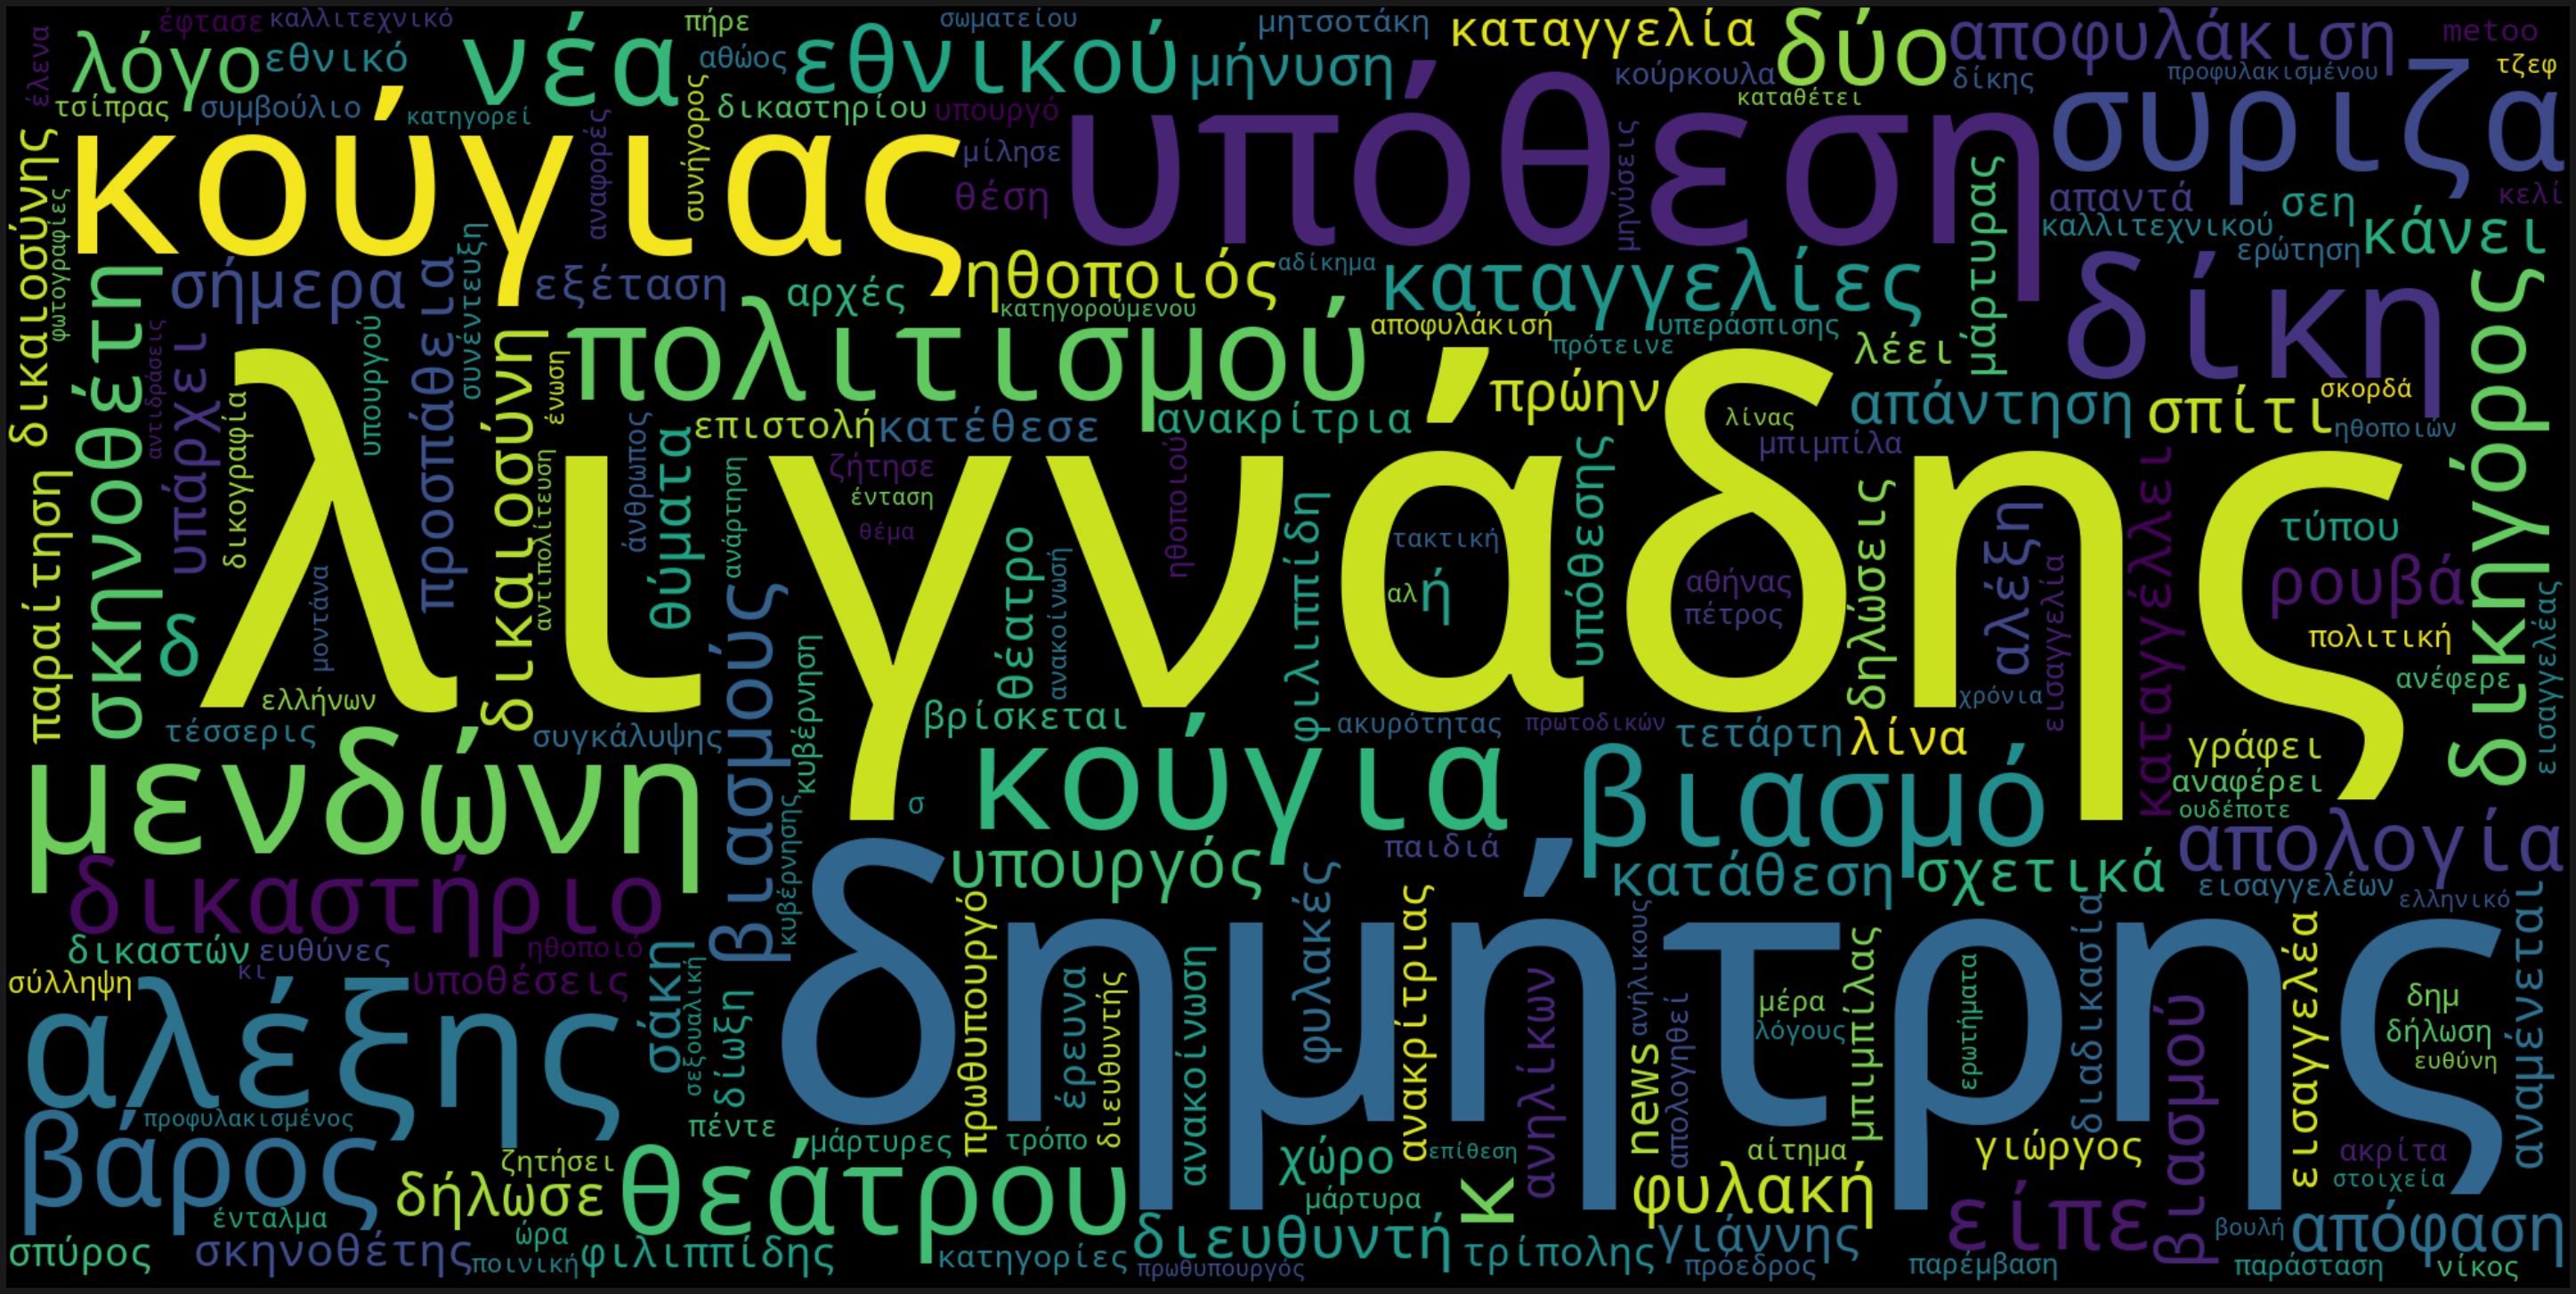

In [319]:
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    collocations=False
).generate( 
    dataframe['text'].str.cat(sep = ' ').replace("amp", ' ')
)


fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


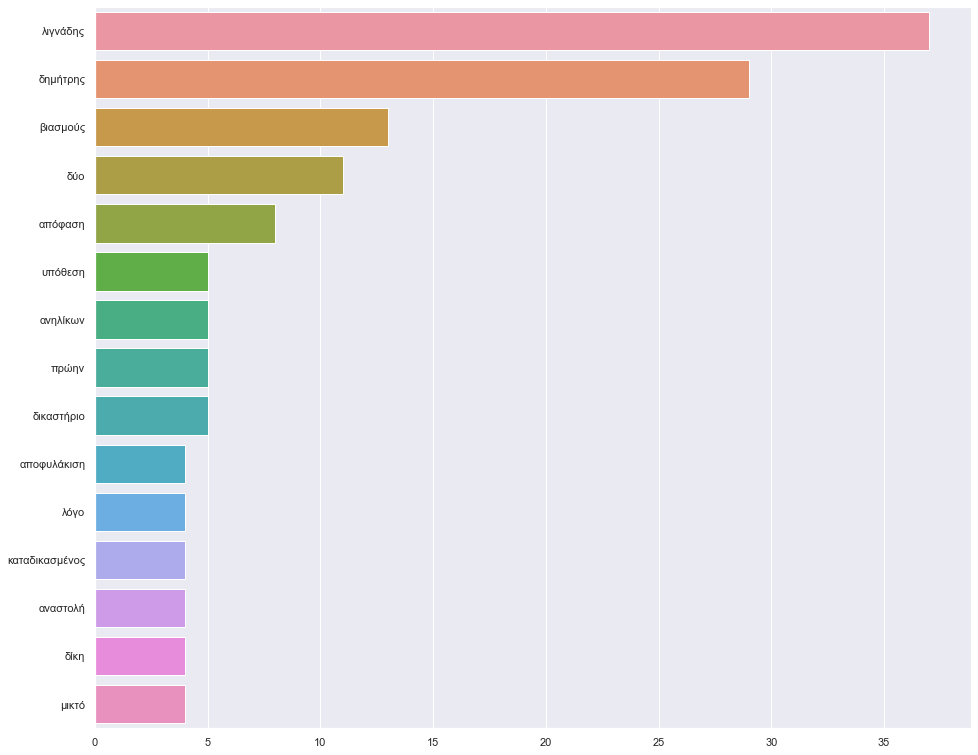

In [320]:
# 15 most frequent words
all_words = []
for txt in dataframe.text[:50]:
    txt_no_punctuation = txt.translate(str.maketrans('', '', string.punctuation + '…«»'))
    words = ngrams(txt_no_punctuation.split(), 1)
    all_words.extend(list(words))

bg_dict = collections.Counter(all_words)

bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
bg = [b[0] for b in bg]
counts = list(counts)

top = 15
sns.barplot(counts[:top], bg[:top], orient='h')

sns.set(rc={'figure.figsize': (15.7, 13.27)})
plt.show()

/opt/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


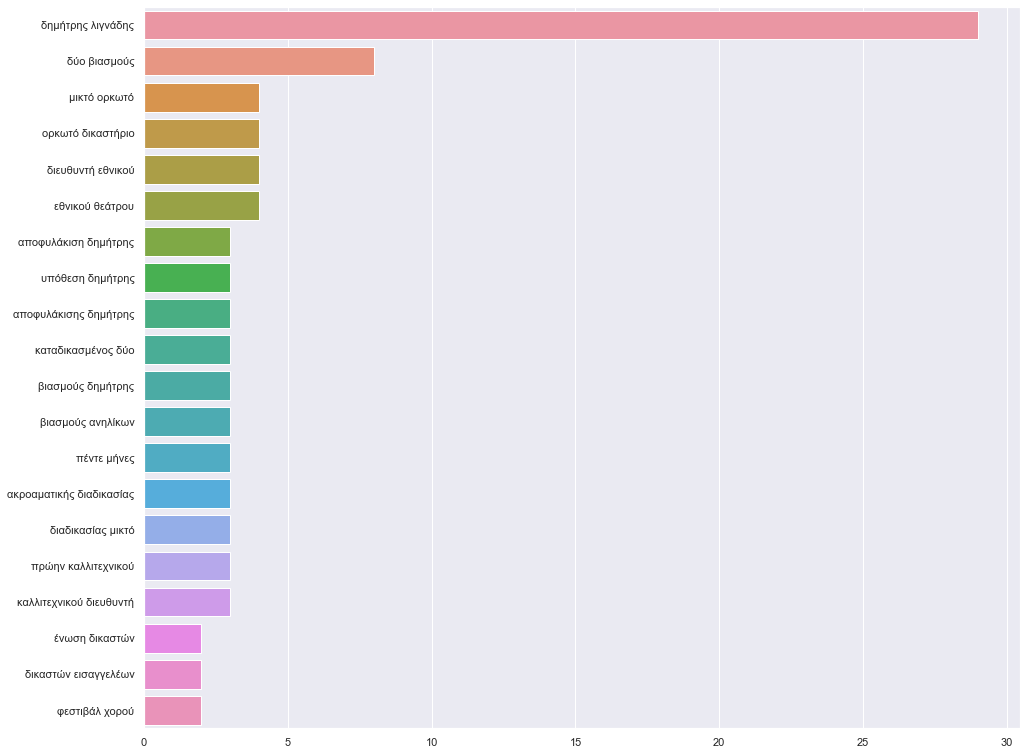

In [321]:
# 20 most frequent bigrams
all_bigrams = []
for txt in dataframe.text[:50]:
    txt_no_punctuation = txt.translate(str.maketrans('', '', string.punctuation + '…«»'))
    bigrams = ngrams(txt_no_punctuation.split(), 2)
    all_bigrams.extend(list(bigrams))

bg_dict = collections.Counter(all_bigrams)

bg_dict_sorted = sorted(bg_dict.items(), key=lambda kv: kv[1], reverse=True)
bg, counts = list(zip(*bg_dict_sorted))
counts = list(counts)
bg_str = list(map(lambda x: ' '.join(x), bg))


top = 20
sns.barplot(counts[:top], bg_str[:top], orient='h')

sns.set(rc={'figure.figsize':(15.7,13.27)})
plt.show()

### Sentiment Analysis

In [322]:
filepath = "NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath).drop_duplicates(subset='word')
emolex_df.Positive = emolex_df.Positive.astype(bool)
emolex_df.Negative = emolex_df.Negative.astype(bool)
emolex_df

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13166,ουρλιασμα,False,True,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,True,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
def remove_accents(txt):
    return txt.replace('ά','α').replace("έ", "ε").replace('ή','η').replace('ί','ι').replace('ό','ο').replace('ύ','υ').replace('ώ','ω')


In [324]:
def word_count_by_sentiment(txt, count_positives=False, count_negatives=False, count_total=False):
    """
    Calculates the percentage of positive, negative and neutral words. 
    """
    tokens = nlp(remove_accents(txt))
    total_words = len([token for token in tokens if not token.is_punct])  # remove tokens of punctuation

    num_positives = 0
    num_negatives = 0
    
    for word in tokens:
        if word.is_punct:
           continue 
        word_clean = word.text

        word_info = emolex_df[emolex_df.word == word_clean].drop_duplicates()
        word_exists_in_lexicon = not word_info.empty
        if word_exists_in_lexicon:
            try:
                is_positive = word_info.Positive.bool()
                is_negative = word_info.Negative.bool()
            except Exception as e:
                print(txt)
                raise e
        else:
            is_positive = False
            is_negative = False

        num_positives += int(is_positive)
        num_negatives += int(is_negative)
    
    if count_positives:
        return num_positives
    elif count_negatives:
        return num_negatives
    elif count_total:
        return total_words


dataframe["num_positive_words"] = dataframe.text.apply(lambda txt: word_count_by_sentiment(txt, count_positives=True))
dataframe["num_negative_words"] = dataframe.text.apply(lambda txt: word_count_by_sentiment(txt, count_negatives=True))
dataframe["num_words"] = dataframe.text.apply(lambda txt: analyse_sentiment(txt, count_total=True))

In [325]:
def get_sentiment(row):
    if row["num_positive_words"] > row["num_negative_words"]:
        return 'positive'
    elif row["num_positive_words"] < row["num_negative_words"]:
        return 'negative'
    else:
        return 'neutral'

dataframe['sentiment'] = dataframe.apply(get_sentiment, axis=1)

<AxesSubplot:ylabel='sentiment'>

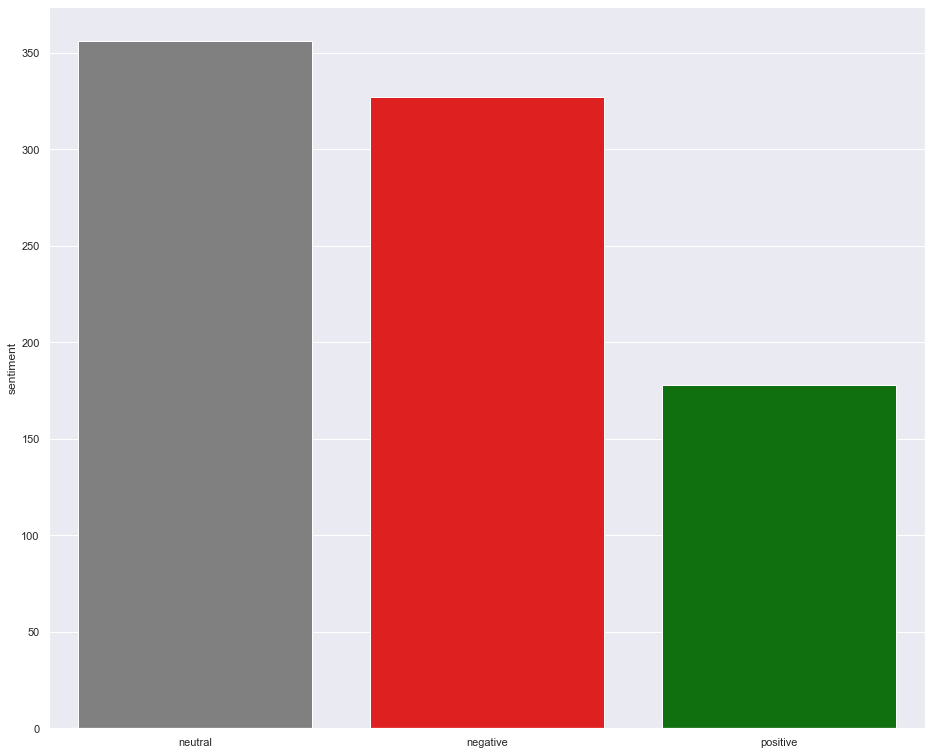

In [343]:
sns.barplot(x=dataframe.sentiment.value_counts().index,
            y=dataframe.sentiment.value_counts(),
            palette=['gray', 'red', 'green'])

## Vectorization and article similarity comparison

In [327]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)

In [328]:
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dataframe['text'])  #finds the tfidf score with normalization
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/Users/alextz/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,10,12,15,19η,19ης,2021,24,25,metoo,news,...,φωτογραφίες,φώφη,χέρια,χαρακτήρισε,χατζάκης,χειλάκης,χρηστίδου,χρόνια,χώρο,ώρα
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.272723,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.613334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [329]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_df = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<AxesSubplot:>

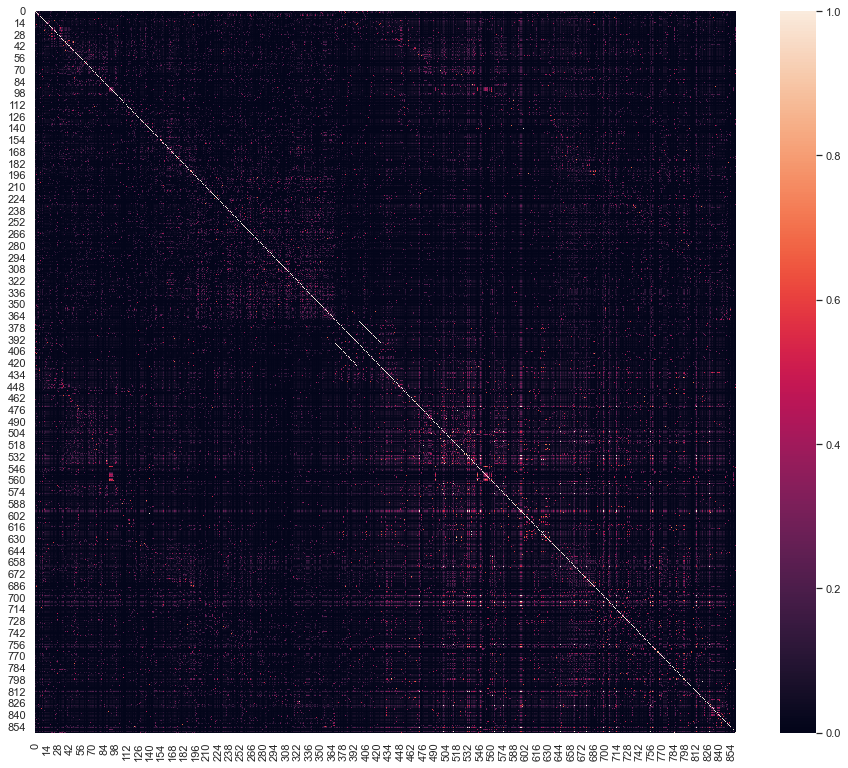

In [330]:
sns.heatmap(similarity_df)

## Other statistics

In [399]:
dataframe['year_month'] = dataframe["date"].dt.strftime('%Y-%m')
num_of_articles_per_date = dataframe.groupby(['year_month']).count()

<AxesSubplot:title={'center':'Articles about lignadis per month'}, xlabel='year_month'>

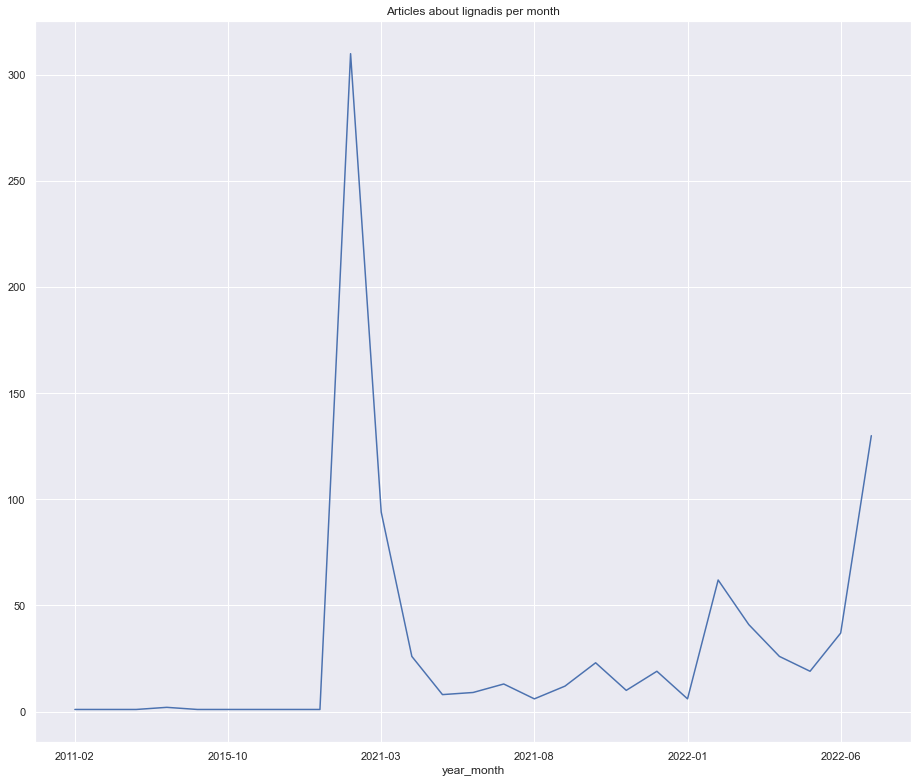

In [403]:
num_of_articles_per_date['text'].plot(title='Articles about lignadis per month')